<a href="https://colab.research.google.com/github/sayansanyal4/VGG19_MODEL/blob/main/CNN_VGG19_Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT LIBRARIES**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# **MOUNT DRIVE**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **DEFINING PATH**

sick


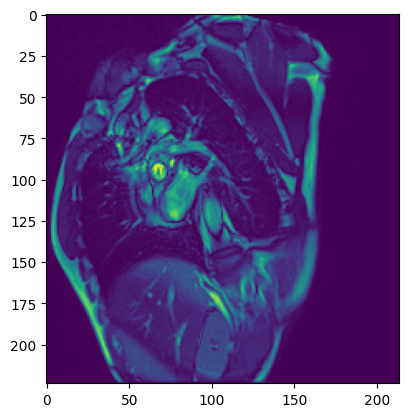

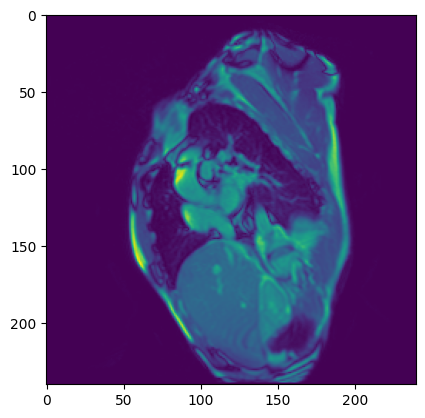

normal


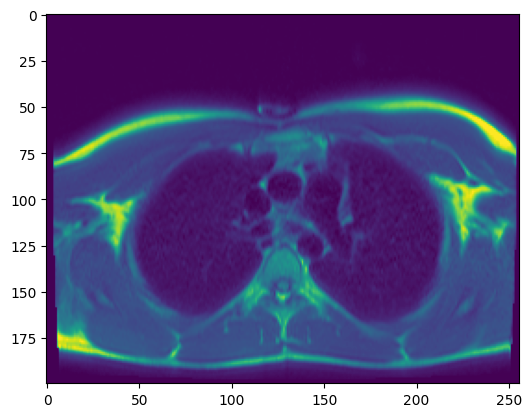

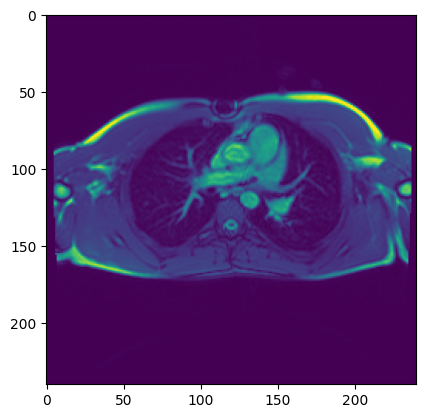

In [4]:
train_path = '/content/drive/My Drive/dataset/cardio_cad/train_data'
valid_path = '/content/drive/My Drive/dataset/cardio_cad/validation'
test_path = '/content/drive/My Drive/dataset/cardio_cad/test_data'
for folder in os.listdir(train_path):
  sub_path=train_path+"/"+folder
  print(folder)
  for i in range(2):
    temp_path=os.listdir(sub_path)[i]
    temp_path=sub_path+"/"+temp_path
    img=mping.imread(temp_path)
    implot=plt.imshow(img)
    plt.show()

# **CONVERTING IMAGES TO PIXELS**

In [5]:
def imagearray(path, size):
  data=[]
  for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for img in os.listdir(sub_path):
      imagepath=sub_path+"/"+img
      img_arr=cv2.imread(imagepath)
      img_arr=cv2.resize(img_arr,size)
      data.append(img_arr)
  return data

In [27]:
%%time
size2=(450,450)
train=imagearray(train_path,size2)
test=imagearray(test_path,size2)
validate=imagearray(valid_path,size2)

CPU times: user 1.87 s, sys: 1.28 s, total: 3.14 s
Wall time: 7.02 s


# **NORMALIZATION**

In [28]:
train

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [29]:
x_train=np.array(train)
x_test=np.array(test)
x_valid=np.array(validate)
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(444, 450, 450, 3)
(225, 450, 450, 3)
(127, 450, 450, 3)


In [30]:
x_train=x_train/255
x_test=x_test/255
x_valid=x_valid/255

# **DEFINING TARGET VARIABLES**

In [31]:
def data_class(data_path, size, class_mode):
  datagen=ImageDataGenerator(rescale=1./255)
  classes=datagen.flow_from_directory(data_path,
                                      target_size=size,
                                      batch_size=32,
                                      class_mode=class_mode)
  return classes

In [32]:
train_class=data_class(train_path, size2,"sparse")
test_class=data_class(test_path, size2,"sparse")
validate_class=data_class(valid_path, size2,"sparse")
print(train_path)

Found 444 images belonging to 2 classes.
Found 225 images belonging to 2 classes.
Found 127 images belonging to 1 classes.
/content/drive/My Drive/dataset/cardio_cad/train_data


In [33]:
y_train=train_class.classes
y_test=test_class.classes
y_validate=validate_class.classes
print("y_train", y_train,
      "\ny_test", y_test,
      "\ny_validate", y_validate)

y_train [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
y_test [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [34]:
train_class.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
train_class.class_indices

{'normal': 0, 'sick': 1}

In [36]:
print("y_train_shape", y_train.shape,
      "y_test_shape", y_test.shape,
      "y_validate_shape", y_validate.shape)

y_train_shape (444,) y_test_shape (225,) y_validate_shape (127,)


In [37]:
vgg=VGG19(input_shape=(450,450,3), weights="imagenet", include_top=False)

In [38]:
for layer in vgg.layers:
  layer.trainable=False

In [39]:
x=Flatten()(vgg.output)
prediction= Dense(3,activation="softmax")(x)

In [40]:
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 450, 450, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 450, 450, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 450, 450, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 225, 225, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 225, 225, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 225, 225, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 112, 112, 128)     0   

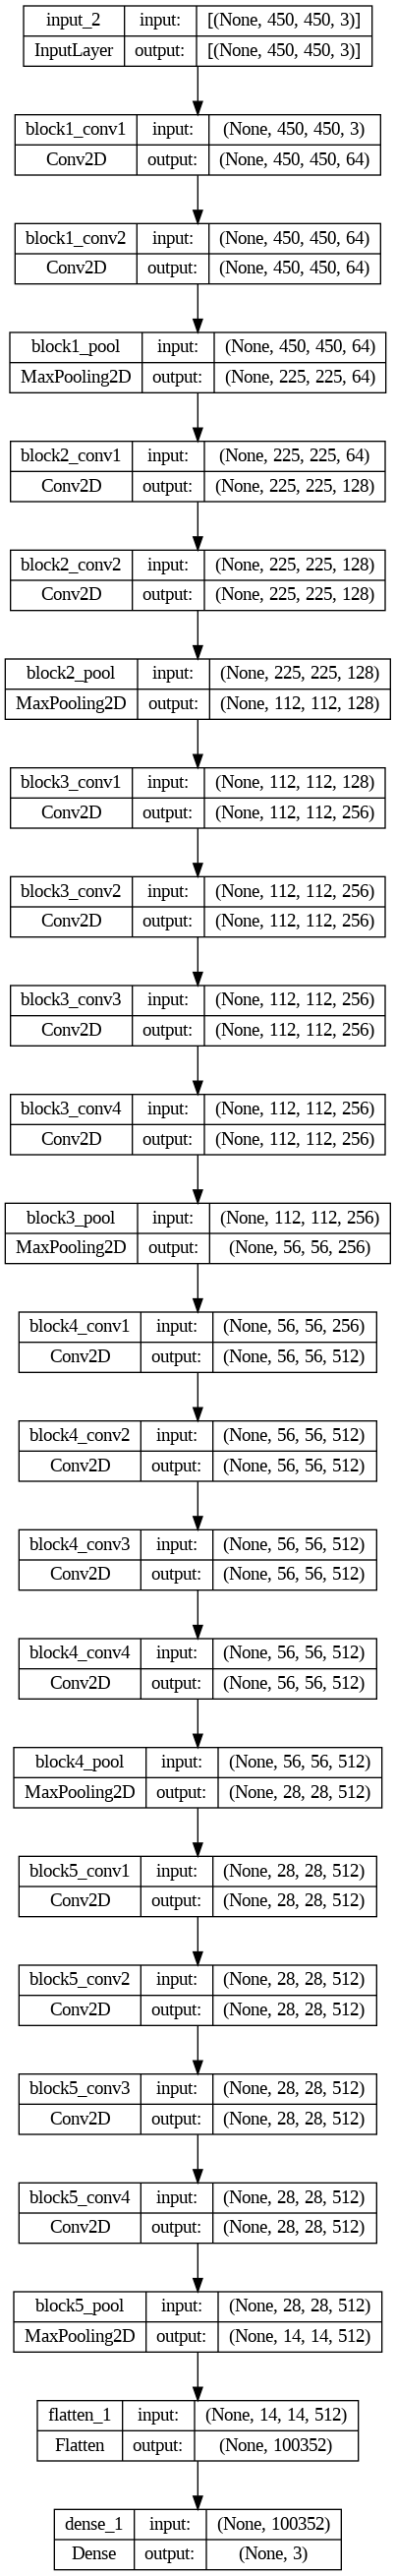

In [41]:
plot_model(model=model,show_shapes=True)

In [42]:
early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [44]:
history=model.fit(x_train,y_train,
          validation_data=(x_valid,y_validate),
          epochs=3,
          callbacks=[early_stop],
          batch_size=30,
          shuffle=True)

Epoch 1/3
15/15 [==============================] - 1938s 130s/step - loss: 1.2911 - accuracy: 0.7162 - val_loss: 9.3057 - val_accuracy: 0.3543
Epoch 2/3
15/15 [==============================] - 1854s 125s/step - loss: 0.5925 - accuracy: 0.8626 - val_loss: 3.8314 - val_accuracy: 0.6535
Epoch 3/3
15/15 [==============================] - 1854s 126s/step - loss: 0.4756 - accuracy: 0.8986 - val_loss: 10.9147 - val_accuracy: 0.4488


# **VISUALIZATION**

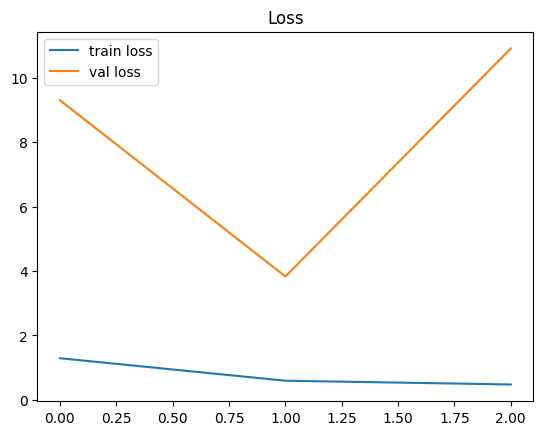

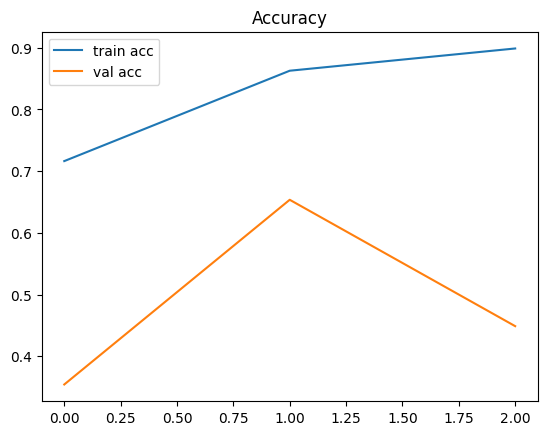

<Figure size 640x480 with 0 Axes>

In [45]:
# loss
# plt.figure(figsize=(10,2))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()
plt.savefig('LossVal_loss')

# accuracies
# plt.figure(figsize=(10,2))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

# **MODEL EVALUATION**

In [46]:
model.evaluate(x_test,y_test,batch_size=32)

8/8 [==============================] - 716s 87s/step - loss: 11.6353 - accuracy: 0.1556


[11.635311126708984, 0.15555556118488312]

In [47]:
y_pred = model.predict(x_test)

8/8 [==============================] - 718s 88s/step


In [48]:
y_pred = np.argmax(y_pred,axis=1)

In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.29      0.25      0.27       140

    accuracy                           0.16       225
   macro avg       0.15      0.12      0.13       225
weighted avg       0.18      0.16      0.17       225



# **CONFUSION MATRIX**

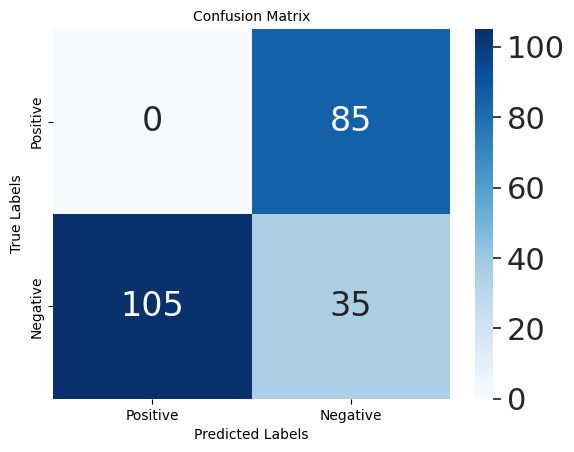

In [50]:
cm = confusion_matrix(y_pred, y_test)

plt.figure()
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm, annot = True, fmt='g',cmap="Blues", ax = ax)
# Labels, title and Ticks
ax.set_xlabel('Predicted Labels', fontsize = 10);ax.set_ylabel('True Labels', fontsize = 10);
ax.set_title('Confusion Matrix', fontsize = 10);
ax.xaxis.set_ticklabels(['Positive','Negative'], fontsize = 10);ax.yaxis.set_ticklabels(['Positive','Negative'], fontsize = 10);


In [51]:
f1_score(y_test,y_pred, average = 'micro')

0.15555555555555556

In [52]:
recall_score(y_test,y_pred, average = 'weighted')

0.15555555555555556

In [53]:
precision_score(y_test,y_pred, average = 'micro')

0.15555555555555556